In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Put your name here: Pavan Yachamaneni </p>

---
# __Modeling with Ordinary Differential Equations: In-Class__

<img src="https://img.zeit.de/news/2020-01/16/chinesisches-coronavirus-auch-in-japan-nachgewiesen-image.jpeg/wide__1300x731" alt="microscopic image of the cronovirus" width=50%>

Image from: [Teller Report](https://www.tellerreport.com/news/2020-01-16---tested-positive--chinese-corona-virus-also-detected-in-japan-.rJGhWTrTe8.html)




# Learning objectives

At the end of the exercise, you should be able to:
- Implement the differential equation solution for the SIR model.
- Generate hypotheses about the potential behavior of a model given model parameters.
- Test hypotheses by running simulation.
- Turn procedural codes into functions with arguments.

# Outline

</p>

1. [Pre-class questions](#preclass)
2. [SRI Examples](#SRI_Examples)
4. [Forest Fires Examples](#fire)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> I was not stuck in the Pre-Class Assignment.

----
<a name="SRI_Examples"></a>
# 2. SIR model for infection propagation

In the in-class exercise, you have read about the [SIR Model describing disease spread](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/).

## 2.1 Implement the differential equation solution

&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbors your answers to the pre-class question on the equation and variables used in SIR:

$$
\begin{equation}
\begin{aligned}
& \frac{dS}{dt}=-\frac{\beta SI}{N} \\
& \frac{dI}{dt}=\frac{\beta SI}{N}-\gamma I \\
& \frac{dR}{dt}=\gamma I
\end{aligned}
\end{equation}
$$

Does your understanding differ from your groupmates? Do you or your groupmate have any misunderstanding?

<font size=+3>&#9998;</font> No. We have understood.

&#9989; **<font color=blue>DO THIS:</font>**  A typical ODE can be solved using explicit Euler time integration with finite difference method. For example, 

$$\frac{d u}{dt} = k u ~~\Longrightarrow~~ \frac{u^{(n+1)}-u^{(n)}}{\Delta t} = k u^{(n)} ~~\Longrightarrow~~ u^{(n+1)} = u^{(n)} + \Delta t \cdot k u^{(n)},$$

where the superscript $(n)$ indicates the n-th time step. 

Include code that uses the Euler time method to update the $S$, $I$, and $R$ polulations in the commented part saying `### PUT YOUR CODE BELOW ###` below. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def run_SIR_simulation(N, I0, R0, beta, gamma, days):
    """Simulating disease spread based on the SIR model
    Args:
      N (int): Total population
      I0 (int): Initial number of infected individual
      R0 (int): Initial number of recovered individual
      beta (float): Contact rate
      gamma (float): Recovery rate in 1/days.
    """

    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0

    # A grid of time points (in days)
    t = np.linspace(0, 160, 160)
    nt = np.size(t)   # time steps
    dt = t[2] - t[1]  # size of time step

    # initial values at t0
    S = S0; I = I0; R = R0

    # create an empty list to collect values
    Sv = []; Iv = []; Rv = []; tv = []
    Sv.append(S/N); Iv.append(I/N); Rv.append(R/N); tv.append(t[0])

    # value at t1
    S_1 = S
    I_1 = I
    R_1 = R

    # time iteration
    for iter in range(1, nt):

        ### PUT YOUR CODE BELOW ### 
        # the SIR equations in Euler time scheme
        S = S - dt*beta*S*I/N# <== fill in here
        I = I + dt*(beta*S*I/N - gamma*I)  # <== fill in here
        R = R + dt*gamma*I   # <== fill in here

        # Update t+1
        S_1 = S
        I_1 = I
        R_1 = R

        # add new values
        Sv.append(S/N); Iv.append(I/N); Rv.append(R/N); tv.append(iter)
    
    # plot the curves    
    fig = plt.figure(facecolor='w', figsize=(6,4))
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(tv, Sv, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(tv, Iv, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(tv, Rv, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel(f'Number/{N})')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(visible = True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

## 2.2 Run SIR simulation

&#9989; **<font color=blue>DO THIS:</font>**  Call `run_SIR_simulation` you have modified by passing the following arguments:
- Population size: N=1000
- Initial infected: I0=1
- Initial recoverd: R0=0
- Contact rate: beta=0.2
- Recover rate: gamma=0.1 (i.e., 1 in 10 days)
- Total duration: days=160

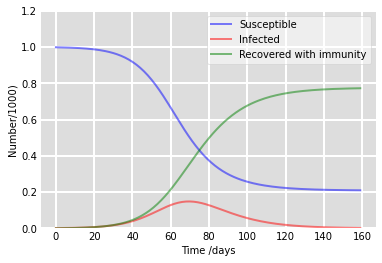

In [26]:
# call the function
run_SIR_simulation(1000,1, 0, 0.2, 0.1, 160)

## 2.3 Impact of input parameters

&#9989; **<font color=red>QUESTION:</font>**  What are your __hypotheses__ on the impact to the curve of infected (shift left or right) when you increase or decrease:

- `N`?
- `I0`?

Discuss with your neighbors and put your hypotheses in the space below.

<font size=+3>&#9998;</font> $N$: The curves shift right on increasing N, and left on decreasing N.

$I_0$: The red curve starts from a higher point and shifts towards left as we increase the I0. For a lower I0, the infected gradually increase and attain maximum slightly before the 80 day mark.

&#9989; **<font color=blue>DO THIS:</font>** Write a for loop to call `run_SIR_simulation` by providving $N \in [10, 40, 160, 640, 2880, 11520]$ to test your hypotheses.

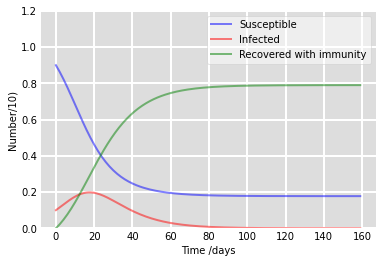

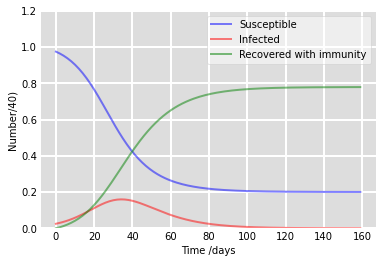

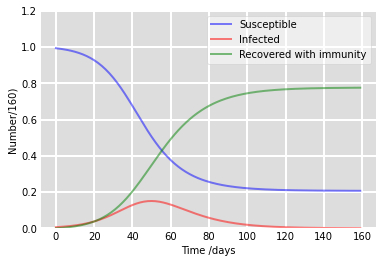

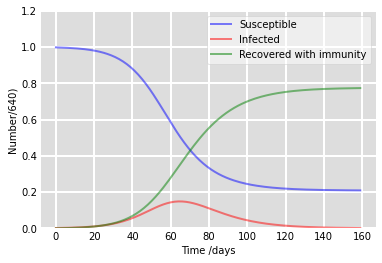

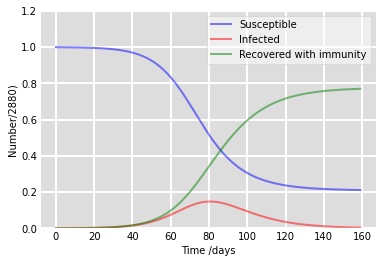

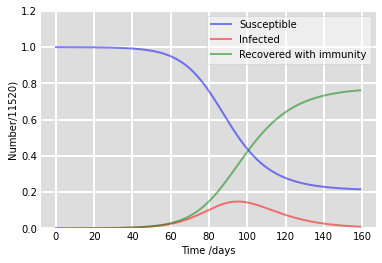

In [32]:
# Put your code here.
N_SIR = [10, 40, 160, 640, 2880, 11520]

for i in N_SIR:
    run_SIR_simulation(i, 1, 0, 0.2, 0.1, 160)

&#9989; **<font color=blue>DO THIS:</font>** Write a for loop to call `run_SIR_simulation` by providving $I_0 \in [1, 4, 16, 64, 288]$ to test your hypotheses.

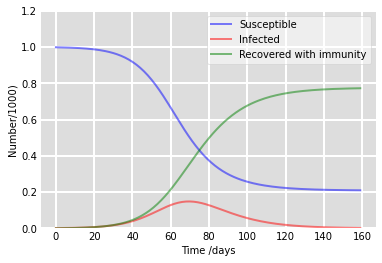

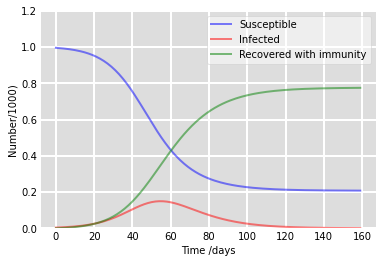

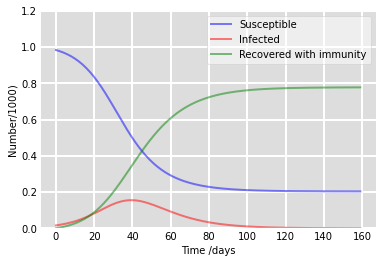

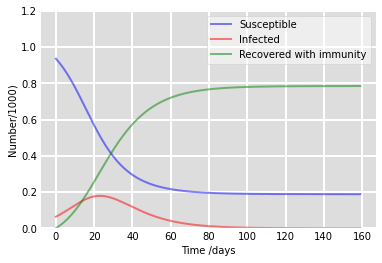

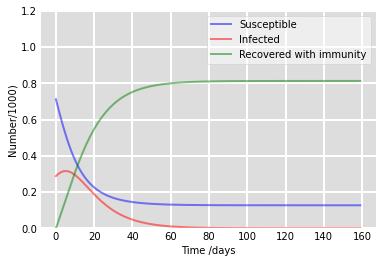

In [33]:
# Put your code here.
I0_SIR = [1, 4, 16, 64, 288]

for i in I0_SIR:
    run_SIR_simulation(1000, i, 0, 0.2, 0.1, 160)

----
<a name="fire"></a>
# 3. Forest Fires simulation

## 3.1 Parameters of the forest fire model

Next we will work on the [Forest Fire model from Learning Scientific Programming with Python](https://scipython.com/blog/the-forest-fire-model).
![image.gif](forest.gif)

&#9989; **<font color=red>QUESTION:</font>** In the model, there are two important values:
- `f`: probabiliy that a cell occupied by a tree becomes burning (even if none of its neighbouring cells are burning) due to lightning strike.
- `p`: probability that an empty cell becomes occupied by a tree.

If we have:
- A fixed `f`, compare a simulation with a lower `p` and another simulation with higher `p`, which simulation do you expect will have a more intense forest fire?
- A fixed `p`, compare a simulation with a lower `f` and another simulation with higher `f`, which simulation do you expect will have a more intense forest fire?

Discuss with your neighbors and put your answers below.

<font size=+3>&#9998;</font> 

## 3.2 Code for the forest fire model

&#9989; **<font color=blue>DO THIS:</font>**  Go to the [Forest Fire model](https://scipython.com/blog/the-forest-fire-model) page:

- Copy and paste the code into the cell below.
- Go through the code and discuss with your neighbor what each part does.

Traceback (most recent call last):
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-10-0dca524a3f4e>", line 67, in animate
    animate.X = iterate(animate.X)
  File "<ipython-input-10-0dca524a3f4e>", line 31, in iterate
    if X[iy,ix] == EMPTY and np.random.random() <= p:
TypeError: '<=' not supported between instances of 'float' and 'tuple'


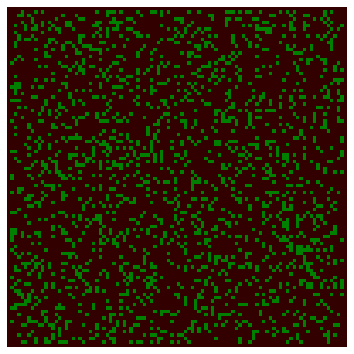

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


IndexError: list index out of range

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors

# Create a forest fire animation based on a simple cellular automaton model.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-forest-fire-model/
# Christian Hill, January 2016.
# Updated January 2020.

# Displacements from a cell to its eight nearest neighbours
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE = 0, 1, 2
# Colours for visualization: brown for EMPTY, dark green for TREE and orange
# for FIRE. Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    X1 = np.zeros((ny, nx))
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
                for dx,dy in neighbourhood:
                    # The diagonally-adjacent trees are further away, so
                    # only catch fire with a reduced probability:
                    if abs(dx) == abs(dy) and np.random.random() < 0.573:
                        continue
                    if X[iy+dy,ix+dx] == FIRE:
                        X1[iy,ix] = FIRE
                        break
                else:
                    if np.random.random() <= f:
                        X1[iy,ix] = FIRE
    return X1

# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
p, f = 0.05, 0.0001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100
# Initialize the forest grid.
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = iterate(animate.X)
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X

# Interval between frames (ms).
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval, frames=200)
#anim.save("forest_fire_p_f.gif")
plt.show()

def simulate_forest_fire(p, f):
    anim.save(f"forest_fire_{p}_{f}.gif")

simulate_forest_fire(0.05, 0.0001)

In [19]:
def func(p,f):
   # The initial fraction of the forest occupied by trees.
    forest_fraction = 0.2
    p=p
    f=f
    # Probability of new tree growth per empty cell, and of lightning strike.
    # Forest size (number of cells in x and y directions).
    nx, ny = 100, 100
    # Initialize the forest grid.
    X  = np.zeros((ny, nx))
    X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
    X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction
    neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
    EMPTY, TREE, FIRE = 0, 1, 2
    colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
    cmap = colors.ListedColormap(colors_list)
    bounds = [0,1,2,3]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    def iterate(X):
        """Iterate the forest according to the forest-fire rules."""

        # The boundary of the forest is always empty, so only consider cells
        # indexed from 1 to nx-2, 1 to ny-2
        X1 = np.zeros((ny, nx))
        for ix in range(1,nx-1):
            for iy in range(1,ny-1):
                if X[iy,ix] == EMPTY and np.random.random() <= p:
                    X1[iy,ix] = TREE
                if X[iy,ix] == TREE:
                    X1[iy,ix] = TREE
                    for dx,dy in neighbourhood:
                        # The diagonally-adjacent trees are further away, so
                        # only catch fire with a reduced probability:
                        if abs(dx) == abs(dy) and np.random.random() < 0.573:
                            continue
                        if X[iy+dy,ix+dx] == FIRE:
                            X1[iy,ix] = FIRE
                            break
                    else:
                        if np.random.random() <= f:
                            X1[iy,ix] = FIRE
        return X1

    

    def animate(i):
        im.set_data(animate.X)
        animate.X = iterate(animate.X)
        # Bind our grid to the identifier X in the animate function's namespace.
    animate.X = X

        # Interval between frames (ms).
    interval = 100
    anim = animation.FuncAnimation(fig, animate, interval=interval, frames=200)
    anim.save(f"forest_fire_{p}_{f}.gif")
    plt.show()

In [20]:
# Put your code here
p =(0.001, 0.005, 0.01, 0.1, 0.01, 0.01, 0.01, 0.01)
f = (0.0001, 0.0001, 0.0001, 0.0001, 0.0000001, 0.000001, 0.00001, 0.0001)
func(p[0],f[0])
# The animation function: called to produce a frame for each generation.





MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


&#9989; **<font color=blue>TO DO:</font>** Now run the code. It just show one frame which is not good. Modify the code in the cell above so it will:

- Turn the code into a function called `simulate_forest_fire` with two arguments:
  - `p`: probability of new tree growth per empty cell per unit time.
  - `f`: probabilty of lightning strike per unit time.
- The animation should include a title `forest_fire_p_f.gif` where `p` and `f` are the __values__ you passed into the function.
- Save the animation into an animated GIF file (see how here https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/) with the name `forest_fire_p_f.gif` where `p` and `f` are the __values__.

## 3.3 Impacts of input parameters

&#9989; **<font color=blue>TO DO:</font>** Test your `simulate_forest_fire` function by passing the following combinations of `p` and `f` values:

|Run| p | f |
|---|---|---|
| 1 |0.001|0.0001|
| 2 |0.005|0.0001|
| 3 |0.01|0.0001|
| 4 |0.1|0.0001|
| 5 |0.01|0.0000001|
| 6 |0.01|0.000001|
| 7 |0.01|0.00001|
| 8 |0.01|0.0001|

Discuss with your neighbors whether the buring patterns are as what you have expected. Why and why not?

In [21]:
func(p[1],f[1])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [22]:
func(p[2],f[2])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [24]:
func(p[3],f[3])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [25]:
func(p[4],f[4])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [26]:
func(p[5],f[5])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [27]:
func(p[6],f[6])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [28]:
func(p[7],f[7])

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


## 3.4 Challenge [Optional]

If you get done early and want a challenge, figure out how to render the animation directly in the notebook instead of saving it as gif files.
 

-----
### Congratulations, we're done!